In [1]:
import os
import fitsio
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from   scipy.spatial import KDTree
from   astropy.table import Table
from   multiprocessing import Pool

nproc = 1 #8
#fpath = os.environ['CSCRATCH'] + '/desi/BGS/Sam/randoms.fits'
fpath = '/global/cscratch1/sd/mjwilson/desi/BGS/Sam/randoms.fits'

rand  = fits.open(fpath)
hdr   = rand[1].header

rand  = fitsio.read(fpath)
rand  = rand[:2000*nproc]

# initalise KD_tree for IS_BOUNDARY == 0
rand_centre = rand[rand['IS_BOUNDARY'] == 0]
rand_boundary = rand[rand['IS_BOUNDARY'] == 1]
print(len(rand_centre), len(rand_boundary))

points   = np.c_[rand_centre['CARTESIAN_X'], rand_centre['CARTESIAN_Y'], rand_centre['CARTESIAN_Z']] 
boundary = np.c_[rand_boundary['CARTESIAN_X'], rand_boundary['CARTESIAN_Y'], rand_boundary['CARTESIAN_Z']]

kd_tree  = KDTree(boundary)


points = [x for x in points]

# match that to points where IS_BOUNDARY == 1 to get distance from boundary
dd, ii = kd_tree.query(points, k=1)

1940 60


In [6]:
kd_tree.query?

Signature: kd_tree.query(x, k=1, eps=0, p=2, distance_upper_bound=inf)
Docstring:
Query the kd-tree for nearest neighbors

Parameters
----------
x : array_like, last dimension self.m
    An array of points to query.
k : int, optional
    The number of nearest neighbors to return.
eps : nonnegative float, optional
    Return approximate nearest neighbors; the kth returned value
    is guaranteed to be no further than (1+eps) times the
    distance to the real kth nearest neighbor.
p : float, 1<=p<=infinity, optional
    Which Minkowski p-norm to use.
    1 is the sum-of-absolute-values "Manhattan" distance
    2 is the usual Euclidean distance
    infinity is the maximum-coordinate-difference distance
distance_upper_bound : nonnegative float, optional
    Return only neighbors within this distance. This is used to prune
    tree searches, so if you are doing a series of nearest-neighbor
    queries, it may help to supply the distance to the nearest neighbor
    of the most recent point.

In [2]:
len(ii), len(points), len(boundary), len(dd)

(1940, 1940, 60, 1940)

In [3]:
ii.max()

59

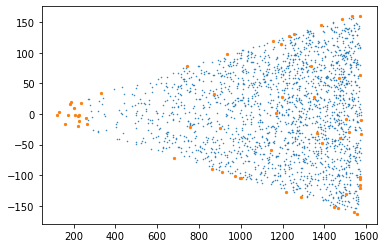

In [4]:
plt.scatter(rand_centre['CARTESIAN_X'], rand_centre['CARTESIAN_Y'], s=0.25)
plt.scatter(rand_boundary['CARTESIAN_X'], rand_boundary['CARTESIAN_Y'], s=5)

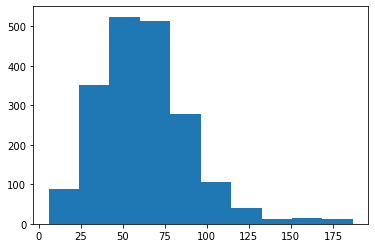

In [5]:
plt.hist(dd)
plt.show()

In [75]:
import numpy as np
from scipy.spatial import KDTree
x, y, z = np.mgrid[0:5, 2:8, 0:1]
tree = KDTree(np.c_[x.ravel(), y.ravel(), z.ravel()])

#dd, ii = tree.query([[0, 0], [2.2, 2.9]], k=1)

dd, ii = tree.query([[0, 0, 0], [2.2, 2.9, 2.1]], k=1)

print(dd, ii, sep='\n')

[2.         2.11187121]
[ 0 13]


In [57]:
import numpy as np
from scipy.spatial import KDTree

x, y, z = np.mgrid[0:5, 2:8, 0:2]
tree = KDTree(np.c_[x.ravel(), y.ravel(), z.ravel()])

dd, ii = tree.query([[0, 0, 0], [2.2,2.9, 2.3], [0,0,0]], k=1)

print(dd, ii, sep='\n')

[2.        1.3190906 2.       ]
[ 0 27  0]


In [53]:
np.c_[x.ravel(), y.ravel()]

array([[0, 2],
       [0, 3],
       [0, 4],
       [0, 5],
       [0, 6],
       [0, 7],
       [1, 2],
       [1, 3],
       [1, 4],
       [1, 5],
       [1, 6],
       [1, 7],
       [2, 2],
       [2, 3],
       [2, 4],
       [2, 5],
       [2, 6],
       [2, 7],
       [3, 2],
       [3, 3],
       [3, 4],
       [3, 5],
       [3, 6],
       [3, 7],
       [4, 2],
       [4, 3],
       [4, 4],
       [4, 5],
       [4, 6],
       [4, 7]])

In [52]:
points

array([[ 1.53163684e+03,  3.41253638e+01,  8.91685722e-01],
       [ 1.01197159e+03,  4.52383603e+01, -4.08567571e-01],
       [ 1.44810872e+03, -1.26514444e+02, -9.12421708e-01],
       ...,
       [ 1.37510442e+03, -9.93746067e+01,  6.55391046e-01],
       [ 1.12499561e+03, -7.80916070e+01, -5.41348308e-01],
       [ 1.41635708e+03,  5.43445401e+01, -3.25880963e-01]])

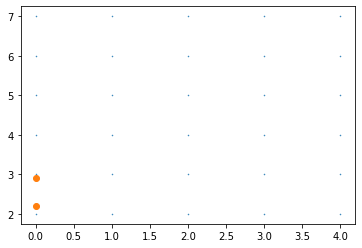

In [50]:
plt.scatter(x, y, s=0.25)
plt.scatter([0, 0], [2.2, 2.9])